In [1]:
#!unzip basicshapes.zip

In [2]:
import os
from glob import glob

In [3]:
glob('shapes/triangles/*')[:10]

['shapes/triangles\\drawing(1).png',
 'shapes/triangles\\drawing(10).png',
 'shapes/triangles\\drawing(100).png',
 'shapes/triangles\\drawing(11).png',
 'shapes/triangles\\drawing(12).png',
 'shapes/triangles\\drawing(13).png',
 'shapes/triangles\\drawing(14).png',
 'shapes/triangles\\drawing(15).png',
 'shapes/triangles\\drawing(16).png',
 'shapes/triangles\\drawing(17).png']

In [4]:
import imageio
import matplotlib.pyplot as plt

In [5]:
#temp = imageio.imread('shapes/triangles/drawing(96).png')

In [6]:
#temp.shape

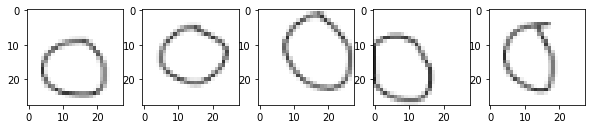

In [7]:
fig = plt.figure(figsize = (10,2))
for i in range(1,6):
    ax = plt.subplot(1,5,i)
    img= imageio.imread(glob('shapes/circles/*')[i])
    plt.imshow(img)



In [8]:
#os.mkdir("shapes_val")

In [9]:
#os.chdir("shapes_val")
#os.mkdir("circles")
#os.mkdir("triangles")
#os.mkdir("squares")
#os.chdir("..")

In [10]:
#os.chdir("..")

In [11]:
print(os.getcwd())

C:\Users\TARIQ KHAN


In [12]:
squares = glob('shapes/squares/*')
circles = glob('shapes/circles/*')
triangles = glob('shapes/triangles/*')

In [13]:
len(squares)

80

In [14]:
'''for img in squares[-20:]:
    os.replace(img, img.replace('shapes', 'shapes_val'))
for img in circles[-20:]:
    os.replace(img, img.replace('shapes', 'shapes_val'))
for img in triangles[-20:]:
    os.replace(img, img.replace('shapes', 'shapes_val'))'''

"for img in squares[-20:]:\n    os.replace(img, img.replace('shapes', 'shapes_val'))\nfor img in circles[-20:]:\n    os.replace(img, img.replace('shapes', 'shapes_val'))\nfor img in triangles[-20:]:\n    os.replace(img, img.replace('shapes', 'shapes_val'))"

In [15]:
#!pip install --upgrade tensorflow keras

In [16]:
import keras

Using TensorFlow backend.
C:\Users\TARIQ KHAN\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\TARIQ KHAN\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\TARIQ KHAN\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\TA

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

In [18]:
classifier = Sequential()

# First Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Flattening
classifier.add(Flatten())

# Full Connection (Hidden Layers)
classifier.add(Dense(64, activation='relu'))

# Output Layer
classifier.add(Dense(3, activation='softmax'))

In [19]:
sgd = SGD(lr = .01)

In [20]:
classifier.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        'shapes',
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
        'shapes_val',
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [24]:
train_set.class_indices

{'circles': 0, 'squares': 1, 'triangles': 2}

In [ ]:
classifier.fit_generator(
        train_set,
        steps_per_epoch=240,
        epochs=5,
        validation_data=validation_set,
        validation_steps=60)


Epoch 1/5
240/240 [==============================] - 30s 125ms/step - loss: 1.0941 - accuracy: 0.3776 - val_loss: 1.0880 - val_accuracy: 0.4500
Epoch 2/5
240/240 [==============================] - 29s 123ms/step - loss: 1.0715 - accuracy: 0.4919 - val_loss: 1.0344 - val_accuracy: 0.5333
Epoch 3/5
240/240 [==============================] - 29s 120ms/step - loss: 1.0236 - accuracy: 0.5618 - val_loss: 0.9751 - val_accuracy: 0.5167
Epoch 4/5
 39/240 [===>..........................] - ETA: 17s - loss: 0.9771 - accuracy: 0.5830

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from PIL import Image

In [ ]:
circle_png = Image.open('imforcnn/cicrcle.png')
sq = Image.open('imforcnn/sq.png')
tr = Image.open('imforcnn/tr.png')
all = Image.open('imforcnn/all.png')

In [ ]:
plt.imshow(all)

In [ ]:
circle_png = circle_png.convert('RGB')
sq = sq.convert('RGB')
tr = tr.convert('RGB')
all = all.convert('RGB')

In [ ]:
cir = circle_png.resize((28,28), Image.ANTIALIAS)
sq = sq.resize((28,28), Image.ANTIALIAS)
tr = tr.resize((28,28), Image.ANTIALIAS)
all = all.resize((28,28), Image.ANTIALIAS)

In [ ]:
plt.imshow(all)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
classifier.predict(np.array(cir).reshape(1,28,28,3))

In [ ]:
train_set.class_indices

----------------------------------------------

In [ ]:
classes = {'circles': 0, 'squares': 1, 'triangles': 2}
classes

In [ ]:
answers = np.array([[0.45, 0.35, 0.2], [0.1, 0.3, 0.6], [0.35, 0.55, 0.1]])

In [ ]:
answers = [np.argmax(ans) for ans in answers]

In [ ]:
answers

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [ ]:
lb.fit(np.array([0,1,2]))

In [ ]:
lb.classes_

In [ ]:
answers = np.array([[0.45, 0.35, 0.2], [0.1, 0.3, 0.6], [0.35, 0.55, 0.1]])

In [ ]:
lb.inverse_transform(answers)